# Classifying Titanic Survival Rate

### Imports

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Importing Dataset

In [23]:
dataset = pd.read_csv('Titanic-Dataset.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

In [24]:
#look at missing values
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


Knowing the missing values: It makes sense to drop some variables and impute others.

Dropping:
- There is no way for us to accurately use/impute cabin when we have so many values missing
- We don't care about passengerID, this was a value assigned in creation of the dataset
- Name is not important, we can get more data out of other values such as ticket for association

Imputing:
- Age feels very important, I think I should test with different methods, more than likely will use mean
- Will test embarked as well, is it vital to our data? Going to plug in mode for now, but curious to see how this correlates

Intuition:
- Disparity between gender, wealth, and age will play a huge role in determining the rate of survival

### Handle Missing Data and Drop Columns

In [25]:
dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
dataset = dataset.drop(['Cabin','PassengerId', 'Name'], axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


/var/folders/04/phmvtntj3c14j2xmcl8rv9680000gn/T/ipykernel_37847/2324488310.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dataset.groupby('AgeGroup')['Survived'].sum()
/var/folders/04/phmvtntj3c14j2xmcl8rv9680000gn/T/ipykernel_37847/2324488310.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deaths = dataset.groupby('AgeGroup')['Survived'].apply(count_zeros)


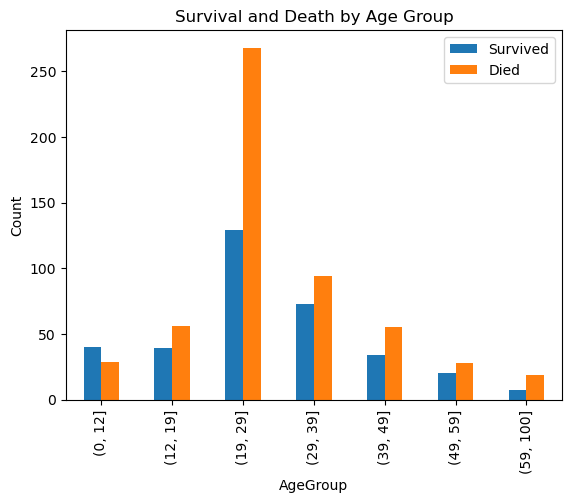

In [26]:
# defining age groups to visualize survival rates
bins = [0, 12, 19, 29, 39, 49, 59, 100]
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins)

# Group by 'AgeGroup' and sum 'Survived'
grouped = dataset.groupby('AgeGroup')['Survived'].sum()

# Calculate the number of deaths per age group
def count_zeros(x):
    counts = x.value_counts()
    return counts.get(0, 0)

deaths = dataset.groupby('AgeGroup')['Survived'].apply(count_zeros)

# dataframe for easier visualization
data = pd.DataFrame({'Survived': grouped, 'Died': deaths})

# plot
data.plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.title('Survival and Death by Age Group')
plt.show()

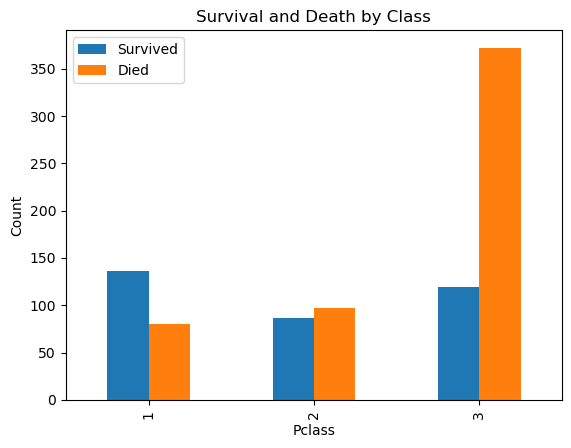

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survival Rate, dtype: float64


In [27]:
#visualizing class vs survival
class_grouped = dataset.groupby('Pclass')['Survived'].sum()
class_deaths = dataset.groupby('Pclass')['Survived'].apply(count_zeros)

#dataframe for easier visualization
class_survival_data = pd.DataFrame({'Survived': class_grouped, 'Died': class_deaths})
class_survival_data.plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.title('Survival and Death by Class')
plt.show()

#Viewing class survival percentages
class_survival_data['Total'] = class_survival_data['Survived'] + class_survival_data['Died']
class_survival_data['Survival Rate'] = class_survival_data['Survived'] / class_survival_data['Total']
print(class_survival_data['Survival Rate'])

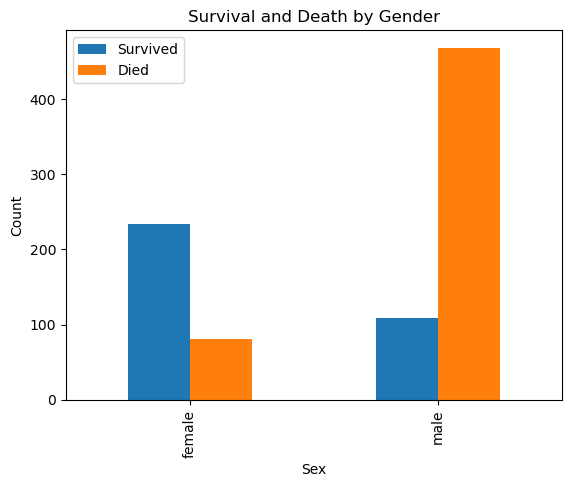

Sex
female    0.742038
male      0.188908
Name: Survival Rate, dtype: float64


In [28]:
#Viewing gender survival percentages
gender_grouped = dataset.groupby('Sex')['Survived'].sum()
gender_death = dataset.groupby('Sex')['Survived'].apply(count_zeros)

#dataframe for easier visualization
gender_survival_data = pd.DataFrame({'Survived': gender_grouped, 'Died': gender_death})
gender_survival_data.plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.title('Survival and Death by Gender')
plt.show()

#Percentages
gender_survival_data['Total'] = gender_survival_data["Survived"] + gender_survival_data['Died']
gender_survival_data['Survival Rate'] = gender_survival_data['Survived'] / gender_survival_data['Total']
print(gender_survival_data['Survival Rate'])

In [29]:
dataset = dataset.drop(['AgeGroup'], axis=1)

In [30]:
# Create a new feature 'TicketFrequency'
dataset['TicketFrequency'] = dataset.groupby('Ticket')['Ticket'].transform('count')
dataset = dataset.drop('Ticket', axis=1)

# Displays how many groups use the same ticket
dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketFrequency
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [31]:
# Checking number of embarked classes
counts = dataset['Embarked'].value_counts()
print(counts)

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


### Encoding Categorical Data

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Embarked'] = le.fit_transform(dataset['Embarked'])
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketFrequency
0,0,3,male,22.0,1,0,7.2500,2,1
1,1,1,female,38.0,1,0,71.2833,0,1
2,1,3,female,26.0,0,0,7.9250,2,1
3,1,1,female,35.0,1,0,53.1000,2,2
4,0,3,male,35.0,0,0,8.0500,2,1


In [33]:
dataset['Sex'] = le.fit_transform(dataset['Sex'])
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketFrequency
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1


In [34]:
X = dataset.iloc[:, 1: ].values #Dont need PassengerID, Name, Cabin
y = dataset.iloc[:, 0].values #Survived

In [35]:
print(X)

[[ 3.      1.     22.     ...  7.25    2.      1.    ]
 [ 1.      0.     38.     ... 71.2833  0.      1.    ]
 [ 3.      0.     26.     ...  7.925   2.      1.    ]
 ...
 [ 3.      0.     28.     ... 23.45    2.      2.    ]
 [ 1.      1.     26.     ... 30.      0.      1.    ]
 [ 3.      1.     32.     ...  7.75    1.      1.    ]]


## Feature Scaling and Splitting Data

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0)  

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Models

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_rf = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
accuracy_score(y_test, y_pred_rf)

[[101   9]
 [ 20  49]]


0.8379888268156425

### SVC

In [40]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='rbf', random_state=0)
svc_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [41]:
y_pred_svc = svc_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)
accuracy_score(y_test, y_pred_svc)

[[96 14]
 [20 49]]


0.8100558659217877

### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred_knn = knn_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
accuracy_score(y_test, y_pred_knn)

[[98 12]
 [21 48]]


0.8156424581005587

### XGB

In [44]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
y_pred_xgb = xgb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)
accuracy_score(y_test, y_pred_xgb)

[[99 11]
 [18 51]]


0.8379888268156425

## Model Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [10,20],
    'learning_rate': [0.01, 0.1],
    'objective': ['binary:logistic'], #binary output
    'booster': ['gbtree'],
    'gamma': [0.01,0.1],
    'subsample': [0.5]
}

#reminder for later, n_jobs=-1 means use all processors
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'booster': 'gbtree', 'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.5}


In [47]:
xgb = XGBClassifier(booster='gbtree', gamma=0.01, learning_rate=0.1, max_depth=10, n_estimators=100, objective='binary:logistic', subsample=0.5)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Confusion Matrix and F1 Score

In [48]:
from sklearn.metrics import recall_score, precision_score, f1_score
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

[[102   8]
 [ 19  50]]
Accuracy: 0.8491620111731844
Precision: 0.8620689655172413
Recall: 0.7246376811594203
F1 Score: 0.7874015748031497


### ROC

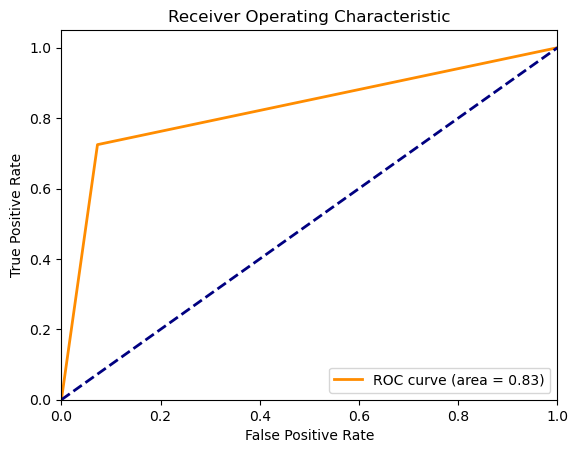

In [49]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
